In [667]:
import pandas as pd

# Replace 'your_data_file.DATA' and 'your_csv_file.csv' with actual file paths
column_names = ["Age", "Work_class", "Final_Weight", "Education", "Education_Num", "Marital_Status", "Occupation", "Relationship",
                "Race", "Sex", "Capital_Gain", "Capital_Loss", "Hours_per_Week", "Native_Country", "Income"]

adult = pd.read_csv('F:\\IIT Platforms\\Second Year\\2 semester\\CM2604 Machine Learning\\Income-Prediction\\Dataset\\adult.data', delimiter=',', names=column_names)  # Adjust delimiter if needed
adult.to_csv('adult.csv', index=False)
adult_data = pd.read_csv("adult.csv")
adult_data.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,29,Local-gov,115585,Some-college,10,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,<=50K
96,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
97,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
98,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K


In [668]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Work_class      32561 non-null  object
 2   Final_Weight    32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education_Num   32561 non-null  int64 
 5   Marital_Status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital_Gain    32561 non-null  int64 
 11  Capital_Loss    32561 non-null  int64 
 12  Hours_per_Week  32561 non-null  int64 
 13  Native_Country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [669]:
adult_data.nunique()

Age                  73
Work_class            9
Final_Weight      21648
Education            16
Education_Num        16
Marital_Status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_Gain        119
Capital_Loss         92
Hours_per_Week       94
Native_Country       42
Income                2
dtype: int64

In [670]:
# Print unique values for each column
for column in adult_data.columns:
    unique_values = adult_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

Age unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Work_class unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Final_Weight unique values:
[ 77516  83311 215646 ...  34066  84661 257302]


Education unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Education_Num unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Marital_Status unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation unique values:
[' Adm-clerical' ' Exec-managerial' ' Handler

In [671]:
# Replace '?' with NaN in the 'Work_class' column
adult_data['Work_class'].replace(' ?', pd.NA, inplace=True)


In [672]:
# Drop rows with NaN in the 'Work_class' column
adult_data = adult_data.dropna(subset=['Work_class'])

# Print unique values for the 'Work_class' column after removing '?'
print("Work_class unique values after removing '?':")
print(adult_data['Work_class'].unique())

Work_class unique values after removing '?':
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [673]:
# Replace '?' with NaN in the 'Occupation' column
adult_data['Occupation'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Occupation' column
adult_data = adult_data.dropna(subset=['Occupation'])

# Print unique values for the 'Occupation' column after removing '?'
print("Occupation unique values after removing '?':")
print(adult_data['Occupation'].unique())

Occupation unique values after removing '?':
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']


In [674]:
# Replace '?' with NaN in the 'Native_Country' column
adult_data['Native_Country'].replace(' ?', pd.NA, inplace=True)

# Drop rows with NaN in the 'Native_Country' column
adult_data = adult_data.dropna(subset=['Native_Country'])

# Print unique values for the 'Native_Country' column after removing '?'
print("Native_Country unique values after removing '?':")
print(adult_data['Native_Country'].unique())

Native_Country unique values after removing '?':
[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic' ' El-Salvador'
 ' France' ' Guatemala' ' Italy' ' China' ' South' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']


In [675]:
# Calculate the mean of 'Capital_Loss' excluding 0 values
median_capital_loss = adult_data[adult_data['Capital_Loss'] != 0]['Capital_Loss'].median()

# Replace 0 values in 'Capital_Loss' with the calculated mean
adult_data['Capital_Loss'] = adult_data['Capital_Loss'].replace(0, median_capital_loss)

# Print the mean value and updated 'Capital_Loss' column
print(f"Mean value of 'Capital_Loss' (excluding 0 values): {median_capital_loss}")
print("\nUpdated 'Capital_Loss' column:")
print(adult_data['Capital_Loss'])
print(adult_data['Capital_Loss'].unique())

Mean value of 'Capital_Loss' (excluding 0 values): 1887.0

Updated 'Capital_Loss' column:
0        1887
1        1887
2        1887
3        1887
4        1887
         ... 
32556    1887
32557    1887
32558    1887
32559    1887
32560    1887
Name: Capital_Loss, Length: 30162, dtype: int64
[1887 2042 1408 1902 1719 1762 1564 2179 1816 1980 1977 1876 1340 2206
 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653 2392 1504
 1590 1651 1628 1848 2001 1740 2002 1579 2258 1602 2547 2205 1726 2444
 1138 2238  625  213 1539  880 1668 1092 1594 2231 1844  810 2824 2559
 2057 1573 1974  974 2174 2149 1735 1258 2603 2282  323 2246 1617 1648
 1825 3770 1755 3683 2129 4356 2267 2080 2457  419  155 3900 2201 1944
 2467 2754 2472 3004 1411]


In [676]:
# Calculate the mean of 'Capital_Gain' excluding 0 values
median_capital_gain = adult_data[adult_data['Capital_Gain'] != 0]['Capital_Gain'].median()

# Replace 0 values in 'Capital_Gain' with the calculated mean
adult_data['Capital_Gain'] = adult_data['Capital_Gain'].replace(0, median_capital_gain)

# Print the mean value and updated 'Capital_Gain' column
print(f"Mean value of 'Capital_Gain' (excluding 0 values): {median_capital_gain}")
print("\nUpdated 'Capital_Gain' column:")
print(adult_data['Capital_Gain'])
print(adult_data['Capital_Gain'].unique())


Mean value of 'Capital_Gain' (excluding 0 values): 7298.0

Updated 'Capital_Gain' column:
0         2174
1         7298
2         7298
3         7298
4         7298
         ...  
32556     7298
32557     7298
32558     7298
32559     7298
32560    15024
Name: Capital_Gain, Length: 30162, dtype: int64
[ 2174  7298 14084  5178  5013  2407 14344 15024  7688  4064  4386  1409
  3674  1055  2050  2176   594 20051  6849  4101  8614  3411  2597 25236
  4650  2463  3103 10605  2964  3325  2580  3471  4865 99999  6514  1471
  2329  2105  2885 10520  2202  2961 27828  6767  2228  1506 13550  2635
  5556  4787  3781  3137  3818   914   401  2829  2977  4934  2062  2354
  3464  5455 15020  1424  3273 22040  4416 10566  4931  7430 34095  6497
  3908   114  2346  2907  1151  9386  2414  2290  3418 15831 41310  4508
  2538  3456  1848  3887  7896  5721  9562  6418  1455  2036  3942  1831
 11678  2936  2993  7443  6360  4687  1797  6723  2009  3432  6097  1639
  2653 18481 25124  7978   991  1173  23

In [677]:
adult_data.drop_duplicates()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,1887,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,1887,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298,1887,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298,1887,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298,1887,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,7298,1887,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,7298,1887,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,7298,1887,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,7298,1887,20,United-States,<=50K


In [678]:
adult_data.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,1887,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,7298,1887,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,7298,1887,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,7298,1887,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,7298,1887,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,20,Private,188300,Some-college,10,Never-married,Tech-support,Own-child,White,Female,7298,1887,40,United-States,<=50K
104,29,Private,103432,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,7298,1887,40,United-States,<=50K
105,32,Self-emp-inc,317660,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,1887,40,United-States,>50K
107,30,Private,194901,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,7298,1887,40,United-States,<=50K


In [679]:
# Sort the DataFrame by the 'Age' column in ascending order
adult_data = adult_data.sort_values(by='Age')

# Display the sorted DataFrame
adult_data.head()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
10180,17,Private,297246,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,7298,1887,9,United-States,<=50K
21767,17,Private,207637,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,7298,1887,10,United-States,<=50K
14720,17,Private,99462,11th,7,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,7298,1887,20,United-States,<=50K
13322,17,Private,345403,10th,6,Never-married,Other-service,Own-child,White,Male,7298,1887,40,United-States,<=50K
26088,17,Private,225507,11th,7,Never-married,Handlers-cleaners,Not-in-family,Black,Female,7298,1887,15,United-States,<=50K


In [680]:
# Assuming you have already read the data into 'adult_data' DataFrame
missing_values = adult_data.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age               0
Work_class        0
Final_Weight      0
Education         0
Education_Num     0
Marital_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_Week    0
Native_Country    0
Income            0
dtype: int64


In [681]:
for column in adult_data.columns:
    unique_values = adult_data[column].unique()
    print(f"{column} unique values:")
    print(unique_values)
    print("\n")

Age unique values:
[17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 88 90]


Work_class unique values:
[' Private' ' Self-emp-not-inc' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' State-gov' ' Without-pay']


Final_Weight unique values:
[297246 207637  99462 ... 221832  40388 139660]


Education unique values:
[' 11th' ' 10th' ' 12th' ' HS-grad' ' 9th' ' 5th-6th' ' Some-college'
 ' 7th-8th' ' Masters' ' Assoc-voc' ' Preschool' ' 1st-4th' ' Bachelors'
 ' Assoc-acdm' ' Doctorate' ' Prof-school']


Education_Num unique values:
[ 7  6  8  9  5  3 10  4 14 11  1  2 13 12 16 15]


Marital_Status unique values:
[' Never-married' ' Married-civ-spouse' ' Married-spouse-absent'
 ' Divorced' ' Separated' ' Married-AF-spouse' ' Widowed']


Occupation unique values:
[' Priv-house-serv' ' Handlers-cleaners' ' Other-service' ' Sales'
 ' 

In [682]:
adult_test = pd.read_csv("adult_test_processed.csv")
adult_test.head(100)

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,17,Private,144752,10th,6,Never-married,Handlers-cleaners,Own-child,Amer-Indian-Eskimo,Male,7298,1902,20,United-States,<=50K
1,17,Self-emp-not-inc,33230,11th,7,Never-married,Farming-fishing,Own-child,White,Male,7298,1902,15,United-States,<=50K
2,17,Private,190941,10th,6,Never-married,Sales,Own-child,White,Female,7298,1902,20,United-States,<=50K
3,17,Private,329791,12th,8,Never-married,Handlers-cleaners,Own-child,White,Male,7298,1902,25,United-States,<=50K
4,17,Private,284277,11th,7,Never-married,Other-service,Own-child,White,Male,1055,1902,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17,Private,194946,11th,7,Never-married,Other-service,Own-child,White,Female,7298,1902,20,United-States,<=50K
96,17,Private,81010,11th,7,Never-married,Sales,Own-child,White,Female,7298,1902,20,United-States,<=50K
97,17,Private,132187,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,7298,1902,15,United-States,<=50K
98,17,Private,52012,11th,7,Never-married,Other-service,Own-child,White,Female,7298,1902,15,United-States,<=50K


In [683]:
# Concatenate the DataFrames along the rows
concatenated_df = pd.concat([adult_data, adult_test], ignore_index=True)

# Display the first few rows of the concatenated DataFrame
print(concatenated_df.head(100))

# Save the concatenated DataFrame to a new CSV file
concatenated_df.to_csv('concatenated_data.csv', index=False)

    Age Work_class  Final_Weight Education  Education_Num  Marital_Status  \
0    17    Private        297246      11th              7   Never-married   
1    17    Private        207637      11th              7   Never-married   
2    17    Private         99462      11th              7   Never-married   
3    17    Private        345403      10th              6   Never-married   
4    17    Private        225507      11th              7   Never-married   
..  ...        ...           ...       ...            ...             ...   
95   17    Private        400225      11th              7   Never-married   
96   17    Private        289405      11th              7   Never-married   
97   17    Private        115551      11th              7   Never-married   
98   17    Private        198146      11th              7   Never-married   
99   17    Private        147339      10th              6   Never-married   

            Occupation    Relationship                 Race      Sex  \
0  

In [684]:
concatenated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             45222 non-null  int64 
 1   Work_class      45222 non-null  object
 2   Final_Weight    45222 non-null  int64 
 3   Education       45222 non-null  object
 4   Education_Num   45222 non-null  int64 
 5   Marital_Status  45222 non-null  object
 6   Occupation      45222 non-null  object
 7   Relationship    45222 non-null  object
 8   Race            45222 non-null  object
 9   Sex             45222 non-null  object
 10  Capital_Gain    45222 non-null  int64 
 11  Capital_Loss    45222 non-null  int64 
 12  Hours_per_Week  45222 non-null  int64 
 13  Native_Country  45222 non-null  object
 14  Income          45222 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


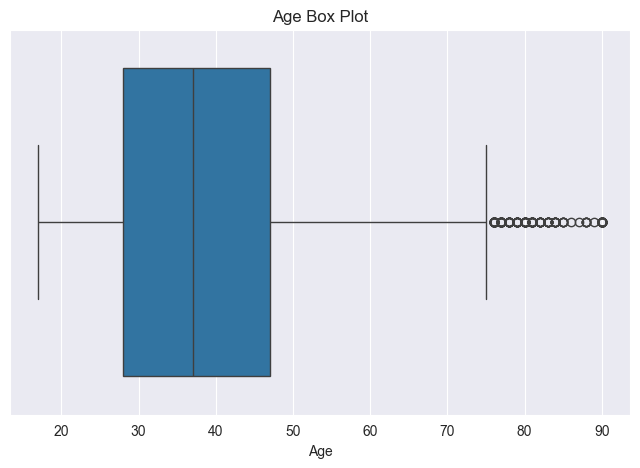

In [685]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the "Age" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Age"])
plt.title("Age Box Plot")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19336\665337724.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '38.25002227171492' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  concatenated_df.loc[concatenated_df["Age"] > 75, "Age"] = age_mean_below_70


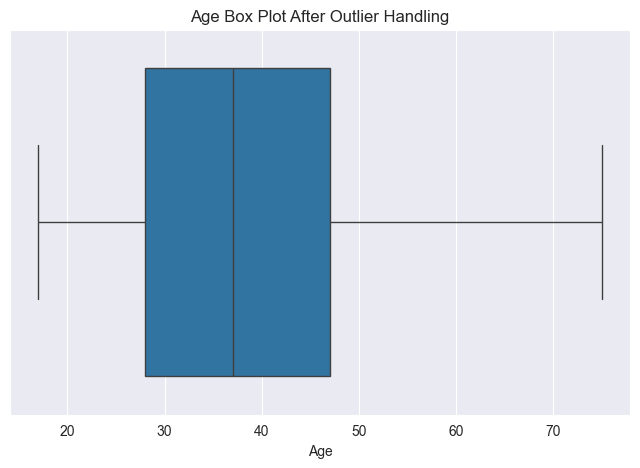

In [686]:
# Handle outliers by replacing values above 70 with the mean of values below 70
age_mean_below_70 = concatenated_df.loc[concatenated_df["Age"] < 75, "Age"].mean()
concatenated_df.loc[concatenated_df["Age"] > 75, "Age"] = age_mean_below_70

# Create a box plot for the "Age" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Age"])
plt.title("Age Box Plot After Outlier Handling")
plt.show()

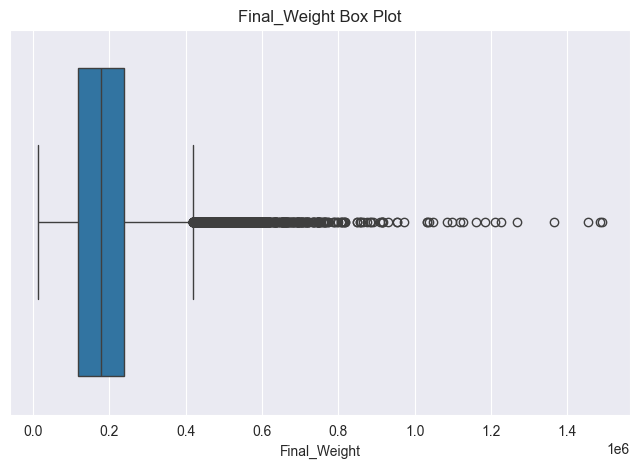

In [687]:
# Create a box plot for the "Final_Weight" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Final_Weight"])
plt.title("Final_Weight Box Plot")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19336\102443755.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '189734.7343107337' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  concatenated_df.loc[concatenated_df["Final_Weight"] > outlier_threshold, "Final_Weight"] = final_weight_mean


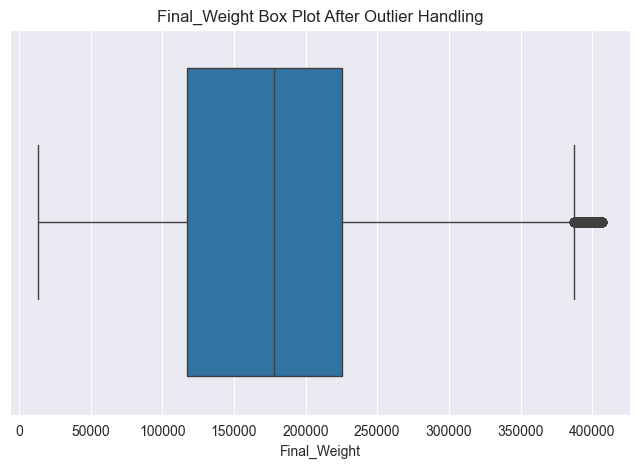

In [688]:
# Handle outliers by replacing values above 1.4 times the IQR with the mean of all values
Q1 = concatenated_df["Final_Weight"].quantile(0.25)
Q3 = concatenated_df["Final_Weight"].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.4 * IQR

final_weight_mean = concatenated_df["Final_Weight"].mean()
concatenated_df.loc[concatenated_df["Final_Weight"] > outlier_threshold, "Final_Weight"] = final_weight_mean

# Create a box plot for the "Final_Weight" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Final_Weight"])
plt.title("Final_Weight Box Plot After Outlier Handling")
plt.show()

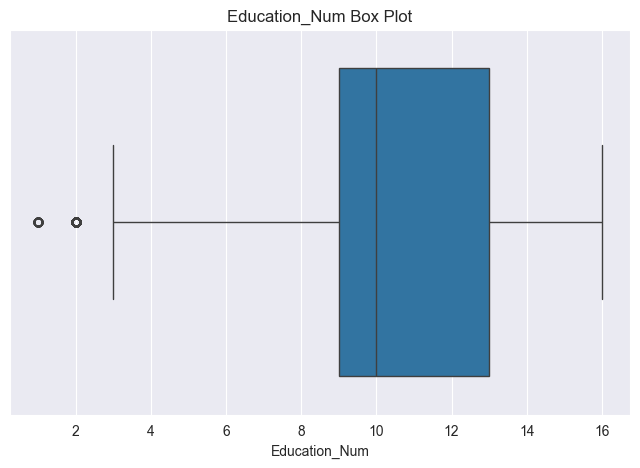

In [689]:
 # Create a box plot for the "Education_Num" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Education_Num"])
plt.title("Education_Num Box Plot")
plt.show()

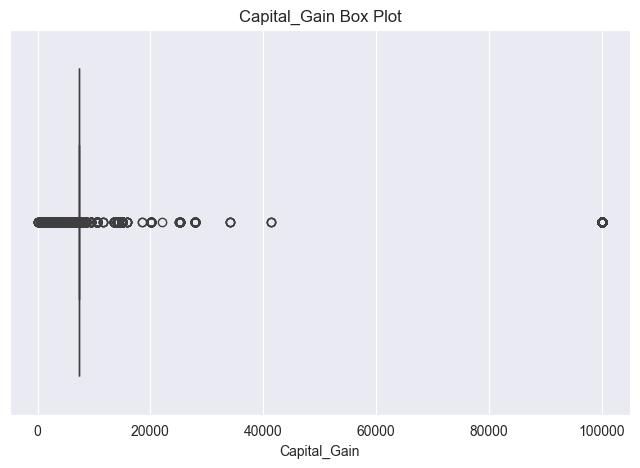

In [690]:
# Create a box plot for the "Capital_Gain" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Capital_Gain"])
plt.title("Capital_Gain Box Plot")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_19336\249147987.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '7318.46838397084' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  concatenated_df.loc[concatenated_df["Capital_Gain"] > outlier_threshold, "Capital_Gain"] = capital_gain_mean_below_threshold


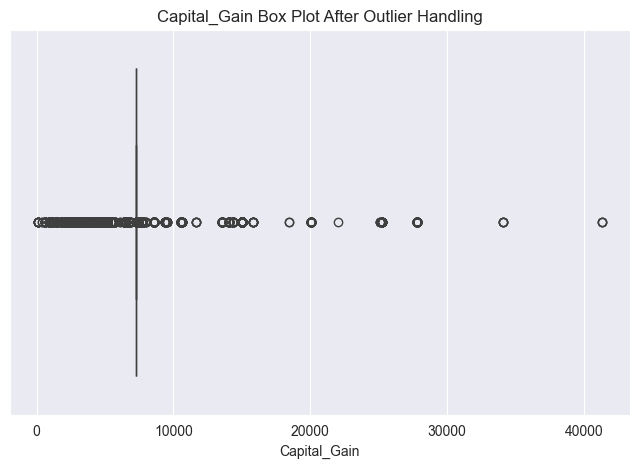

In [691]:
# Handle outliers by replacing values above 6000 with the mean of values below that threshold
outlier_threshold = 60000

capital_gain_mean_below_threshold = concatenated_df.loc[concatenated_df["Capital_Gain"] <= outlier_threshold, "Capital_Gain"].mean()
concatenated_df.loc[concatenated_df["Capital_Gain"] > outlier_threshold, "Capital_Gain"] = capital_gain_mean_below_threshold

# Create a box plot for the "Capital_Gain" column after handling outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Capital_Gain"])
plt.title("Capital_Gain Box Plot After Outlier Handling")
plt.show()

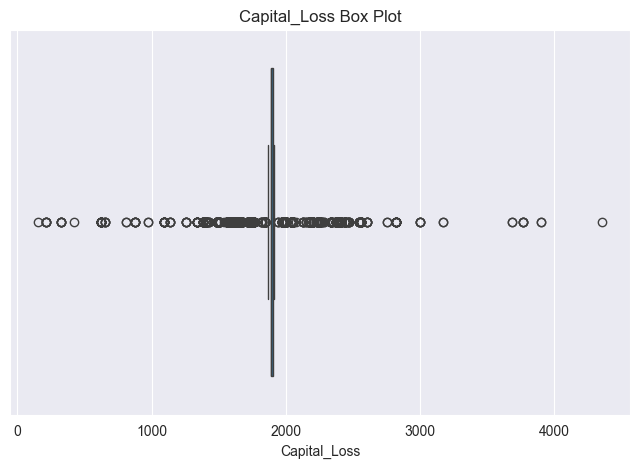

In [692]:
# Create a box plot for the "Capital_Loss" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Capital_Loss"])
plt.title("Capital_Loss Box Plot")
plt.show()

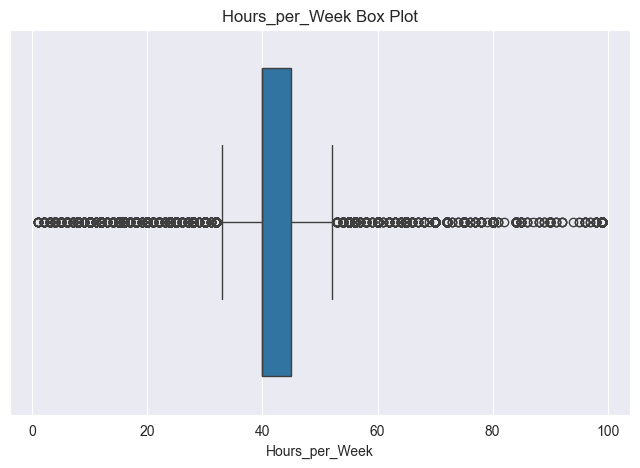

In [693]:
# Create a box plot for the "Hours_per_Week" column
plt.figure(figsize=(8, 5))
sns.boxplot(x=concatenated_df["Hours_per_Week"])
plt.title("Hours_per_Week Box Plot")
plt.show()

In [694]:
concatenated_df.head()

,Age,Work_class,Final_Weight,Education,Education_Num,Marital_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_Week,Native_Country,Income
0,17.0,Private,297246.0,11th,7,Never-married,Priv-house-serv,Own-child,White,Female,7298.0,1887,9,United-States,<=50K
1,17.0,Private,207637.0,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,7298.0,1887,10,United-States,<=50K
2,17.0,Private,99462.0,11th,7,Never-married,Other-service,Own-child,Amer-Indian-Eskimo,Female,7298.0,1887,20,United-States,<=50K
3,17.0,Private,345403.0,10th,6,Never-married,Other-service,Own-child,White,Male,7298.0,1887,40,United-States,<=50K
4,17.0,Private,225507.0,11th,7,Never-married,Handlers-cleaners,Not-in-family,Black,Female,7298.0,1887,15,United-States,<=50K


In [695]:
print(concatenated_df.dtypes)

Age               float64
Work_class         object
Final_Weight      float64
Education          object
Education_Num       int64
Marital_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss        int64
Hours_per_Week      int64
Native_Country     object
Income             object
dtype: object


In [696]:
# Assuming 'adult_data' is your DataFrame

# One-hot encode categorical columns
categorical_columns = ['Work_class', 'Education', 'Marital_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_Country']
adult_data_encoded = pd.get_dummies(concatenated_df, columns=categorical_columns, drop_first=True)

# Save the DataFrame to a CSV file
adult_data_encoded.to_csv('adult_data_encoded.csv', index=False)

In [697]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error
# Load the preprocessed data
# You can replace 'path_to_your_data.csv' with the actual path to your preprocessed dataset
data = pd.read_csv('adult_data_encoded.csv')

# Use label encoding for the 'Income' column
label_encoder = LabelEncoder()
data['Income'] = label_encoder.fit_transform(data['Income'])


# Assuming your target variable is 'Income' and features are all other columns
X = data.drop('Income', axis=1)
y = data['Income']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naïve Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predictions on the test set
nb_predictions = nb_classifier.predict(X_test)

# Evaluate Naïve Bayes Classifier
print("Naïve Bayes Classifier:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print(nb_classifier.score(X_train,y_train))
print("Classification Report:")
print(classification_report(y_test, nb_predictions))

Naïve Bayes Classifier:
Accuracy: 0.7499170812603648
0.7532133676092545
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.96      0.85      6783
           1       0.50      0.12      0.20      2262

    accuracy                           0.75      9045
   macro avg       0.63      0.54      0.53      9045
weighted avg       0.70      0.75      0.69      9045


In [698]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predictions on the test set
rf_predictions = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(rf_classifier.score(X_train,y_train))

print("Classification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Classifier:
Accuracy: 0.843338861249309
0.9998894325123697
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6783
           1       0.72      0.61      0.66      2262

    accuracy                           0.84      9045
   macro avg       0.80      0.77      0.78      9045
weighted avg       0.84      0.84      0.84      9045


In [699]:
import numpy as np
# Calculate MAE and RMSE for Naïve Bayes predictions
mae_nb = mean_absolute_error(y_test, nb_predictions)
rmse_nb = np.sqrt(mean_squared_error(y_test, nb_predictions))
print("MAE for Naïve Bayes:", mae_nb)
print("RMSE for Naïve Bayes:", rmse_nb)

# Calculate MAE and RMSE for Random Forest predictions
mae_rf = mean_absolute_error(y_test, rf_predictions)
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("MAE for Random Forest:", mae_rf)
print("RMSE for Random Forest:", rmse_rf)

MAE for Naïve Bayes: 0.2500829187396352
RMSE for Naïve Bayes: 0.5000829118652578
MAE for Random Forest: 0.156661138750691
RMSE for Random Forest: 0.39580441982207704
